# Project: 2D Chest X-Ray Pneumonia Detection

## Exploratory Data Analysis

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here

In [97]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation

# all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
# all_xray_df.sample(3)

data_sample = pd.read_csv('sample_labels.csv')
# data_sample_y_train = data_sample['Finding Labels']
data_sample.sample(3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
1384,00007168_001.png,No Finding,1,7168,059Y,M,AP,2500,2048,0.171,0.171
3041,00014949_001.png,No Finding,1,14949,055Y,F,AP,2500,2048,0.168,0.168
1325,00006952_006.png,No Finding,6,6952,030Y,M,AP,2048,2500,0.168,0.168


EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [ ]:
## EDA
# Column Names
# Image Index,Finding Labels,Follow-up #,
00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneumothorax,005,
# Patient ID,Patient Age,Patient Gender,View Position,
00000013,060Y,M,AP,
# OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3056,2544,0.139,0.139

## Dataset Summary

In [98]:
# Number of sample labels: 5606
n_sample_labels = len(data_sample)
n_sample_labels

5606

## Patient Demographic

Gender, age, patient position, etc

In [99]:
data_sample[['Patient Gender', 'Patient Age', 'View Position']]

,Patient Gender,Patient Age,View Position
0,M,060Y,AP
1,M,057Y,AP
2,M,077Y,AP
3,M,079Y,PA
4,F,055Y,AP
...,...,...,...
5601,M,058Y,PA
5602,F,061Y,AP
5603,F,052Y,PA
5604,F,010Y,PA


<BarContainer object of 2 artists>

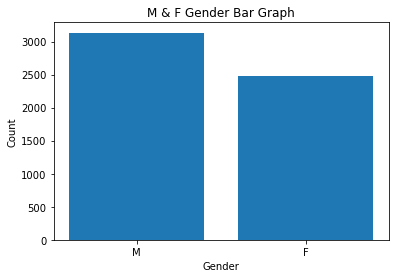

In [100]:
gender_data = {}

for gender in data_sample['Patient Gender']:
    if gender not in gender_data:
        gender_data[gender] = 0 # create key if doesnt exist
    else:
        gender_data[gender] += 1 # inc key's value

plt.title("M & F Gender Bar Graph")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.bar(gender_data.keys(), gender_data.values())

## X-Ray Views Taken

View position

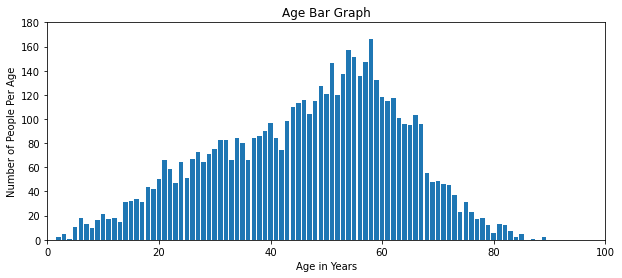

In [101]:
patient_age = []
age_data = {}

for age in data_sample["Patient Age"]:
    if "Y" in age:
        temp_age = int(age.replace("Y",""))
        patient_age.append(temp_age)


        
# filter for age in years, ignore age months and days
for age in patient_age:
    if age not in age_data:
        age_data[age] = 0
    elif age in age_data:
        age_data[age] += 1
        
        
plt.figure(figsize=(10,4))
plt.title("Age Bar Graph")
plt.xlabel("Age in Years")
plt.ylabel("Number of People Per Age")
plt.bar(age_data.keys(), age_data.values())
# pyplot zooming in: https://stackoverflow.com/questions/11400579/pyplot-zooming-in
plt.axis([0, 100, 0, 180])
plt.show()


view_pos = AP
view_pos = PA


<BarContainer object of 2 artists>

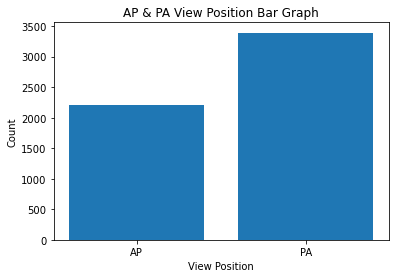

In [102]:
view_pos_data = {}

# filter for view pos
for view_pos in data_sample["View Position"]:
    if view_pos not in view_pos_data:
        view_pos_data[view_pos] = 0
        print("view_pos = {}".format(view_pos))
    elif age in age_data:
        view_pos_data[view_pos] += 1
        
plt.title("AP & PA View Position Bar Graph")
plt.xlabel("View Position")
plt.ylabel("Count")
plt.bar(view_pos_data.keys(), view_pos_data.values())

## Number of Cases

Number of non-pneumonia cases vs pneumonia cases

<BarContainer object of 2 artists>

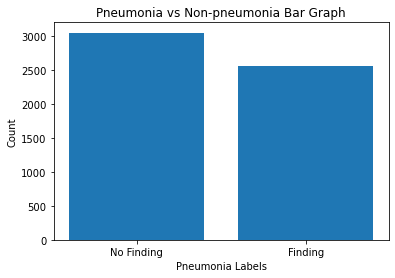

In [103]:
pneumonia_data = {'No Finding': 0, 'Finding': 0}

# filter for view pos
for pneumonia in data_sample["Finding Labels"]:
    if pneumonia == 'No Finding':
        pneumonia_data['No Finding'] += 1
    else:
        pneumonia_data['Finding'] += 1
        
plt.title("Pneumonia vs Non-pneumonia Bar Graph")
plt.xlabel("Pneumonia Labels")
plt.ylabel("Count")
plt.bar(pneumonia_data.keys(), pneumonia_data.values())

## Distribution of Other Diseases

Distribution of other diseases comorbid with pneumonia

<BarContainer object of 243 artists>

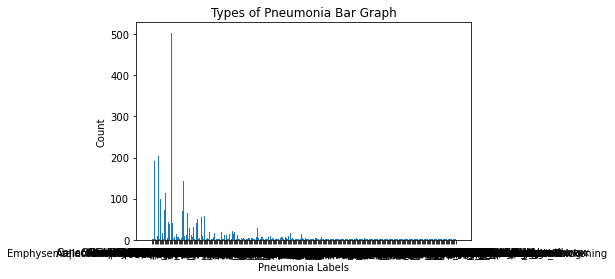

In [106]:
pneumonia_type_data = {}

# filter for view pos
for pneumonia in data_sample["Finding Labels"]:
    if pneumonia != 'No Finding': # add comma separated delimiter "|"
        if pneumonia not in pneumonia_type_data:
            pneumonia_type_data[pneumonia] = 0
        if pneumonia in pneumonia_type_data:
            pneumonia_type_data[pneumonia] += 1
        
plt.title("Types of Pneumonia Bar Graph")
plt.xlabel("Pneumonia Labels")
plt.ylabel("Count")
plt.bar(pneumonia_type_data.keys(), pneumonia_type_data.values())

## Number of Diseases Per Patient

## Pixel-Level Assessments of Imaging Data

Pixel-level assessments of imaging data for healthy & disease states of interest (ex: histograms of intensity values) and compare distributions across diseases